In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
df_2012 = pd.read_csv('../input/Fig.10-03-data-12.csv', encoding='utf8', engine='python', usecols = range(1,4))
df_1975 = pd.read_csv('../input/Fig.10-03-data-75.csv', encoding='utf8', engine='python', usecols = range(1,4))

print(df_2012.dtypes)
print(df_1975.dtypes)

species     object
blength    float64
bdepth      object
dtype: object
species             object
Beak length, mm    float64
Beak depth, mm     float64
dtype: object


In [3]:
# add year for swarmplot 
df_2012['year'] = 2012
df_1975['year'] = 1975


columns = {'species': 'species', 'Beak length, mm':'blength','Beak depth, mm':'bdepth' }

df_1975.rename(columns = columns, inplace = True)

df_2012[['blength','bdepth']] = df_2012[['blength','bdepth']].apply(pd.to_numeric, errors = 'coerce')
df_1975[['blength','bdepth']] = df_1975[['blength','bdepth']].apply(pd.to_numeric, errors = 'coerce')

fortis_12 = df_2012[df_2012['species']=='fortis']
fortis_75 = df_1975[df_1975['species']=='fortis']

scandens_12 = df_2012[df_2012['species']=='scandens'].reset_index(drop=True)
scandens_75 = df_1975[df_1975['species']=='scandens'].reset_index(drop=True)

**EDA of beak depth of Darwin's finches**

For our first foray into the Darwin finch data, we will study how the beak depth of the finch species ** Scandens** has changed over time. The Grants (researcher) have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, **Fortis.** These effects can lead to changes in the species over time.


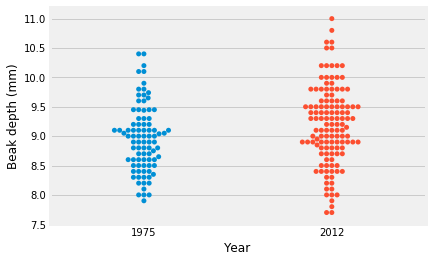

,species,blength,bdepth,year
0,scandens,13.90,8.4,1975
1,scandens,14.00,8.8,1975
2,scandens,12.90,8.4,1975
3,scandens,13.50,8.0,1975
4,scandens,12.90,7.9,1975
5,scandens,14.60,8.9,1975
6,scandens,13.00,8.6,1975
7,scandens,14.20,8.5,1975
8,scandens,14.00,8.9,1975
9,scandens,14.20,9.1,1975


In [4]:
scandens_joint = scandens_75.append(scandens_12)
_ = sns.swarmplot(x = 'year', y = 'bdepth', data = scandens_joint)
_ = plt.xlabel('Year')
_ = plt.ylabel('Beak depth (mm)')
plt.show()
scandens_joint

In [5]:
fortis_bl_12 = fortis_12['blength'].tolist()
fortis_bd_12 = fortis_12['bdepth'].tolist()

fortis_bl_75 = fortis_75['blength'].tolist()
fortis_vd_75 = fortis_75['bdepth'].tolist()

**ECDFs of Scandens' Beak depth**

Bee swarm plot are useful, but we know that Empirical Cumilative Distribution Functions (ECDFs) are often even better for doing EDA. Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.

For the  convenience,  we store the beak depths for the respective years in the NumPy arrays *scandens_bd_75* and *scandens_bd_12.*

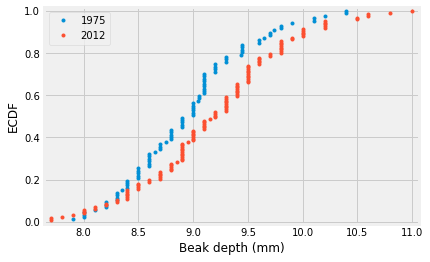

In [6]:
# creating numpy array for the respective years
scandens_bd_75 = np.array(scandens_75['bdepth'].tolist())
scandens_bd_12 = np.array(scandens_12['bdepth'].tolist())


# write ECDF function
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

# calculate ECDFs
x_75, y_75 = ecdf(scandens_bd_75)
x_12, y_12 = ecdf(scandens_bd_12)


# plotting ECDFs
_ = plt.plot(x_75, y_75, marker = '.', linestyle = 'none')
_ = plt.plot(x_12, y_12, marker = '.', linestyle = 'none')
_ = plt.xlabel('Beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975','2012'),loc = 'best')
_ = plt.plot(figsize = (10,6))
_ = plt.margins(0.02)
_ = plt.axis('tight')
plt.show()



**Parameter estimates of beak depths**

Now we are going to estimate the difference of the mean beak depth of the **Scandens samples** from 1975 and 2012 and report a 95% confidence interval.
To do this we need to write a function generating bootstrap replicates.

In [7]:
# for 1D bootstap replicates
def gen_1d_bs(data, func):
    return (func(np.random.choice(data, size = len(data))))

# for many bootstrap replicates
def gen_bs_reps(data, func, size = 1):
    bs_reps = np.empty(size)
    for i in range(size):
        bs_reps[i] = gen_1d_bs(data, func)
    return bs_reps

# difference of means
means_diff = np.mean(scandens_bd_12) - np.mean(scandens_bd_75)

# taking 100,000 bootstrap replicates of means 
bs_reps_12 = gen_bs_reps(scandens_bd_12, np.mean, size = 100000)
bs_reps_75 = gen_bs_reps(scandens_bd_75, np.mean, size = 100000)

# difference of bootstrap replicates of means
bs_reps_diff = bs_reps_12 - bs_reps_75

# 95% confidence interval
conf_int = np.percentile(bs_reps_diff, [2,5, 97.5])

print("Difference of means: ", means_diff, "mm")
print("95% Confidence interval: ", conf_int, "mm")
            

Difference of means:  0.22622047244094645 mm
95% Confidence interval:  [0.05126388 0.08615291 0.39091959] mm


**Hypothesis test: Are beack really got deeper in 2012?**

Sofar, from our VEDA, ECDF and determination of the 95% confidence interval, its pretty clear that the Scandens' beak depth increased over 40 years. But what if we got this result just by chance. To make sure I'll calculate the probability of evolution if means were same. To make the means of data sets equal, I'll shift them and get the bootstrap replicates.

In [8]:
comb_mean_bd = np.mean(np.concatenate((scandens_bd_12, scandens_bd_75)))

shifted_bd_12 = scandens_bd_12 - np.mean(scandens_bd_12) + comb_mean_bd
shifted_bd_75 = scandens_bd_75 - np.mean(scandens_bd_75) + comb_mean_bd

shifted_bs_bd_reps_12 = gen_bs_reps(shifted_bd_12, np.mean, size = 100000)
shifted_bs_bd_reps_75 = gen_bs_reps(shifted_bd_75, np.mean, size = 100000)

# means' difference of bootstrap replicates
reps_means_diff = shifted_bs_bd_reps_12 - shifted_bs_bd_reps_75

# getting p-value
p = np.sum(reps_means_diff >= means_diff)/len(reps_means_diff)
print("p-value: ", p)


p-value:  0.00375


P-value shows statistical significance. So, this mean that the evolutionary change in beak depth of Scandens isTrue.

There is one hypothesis that after drought in winter 1976/77 the number of small seeds sharply dicreased and most of survivors was large seeds. It could have some effect on a shape of birds. 
So, we continue statistical inference on Scandens, to check if there any **variation in beak shapes.**

**Again, let's start with EDA**


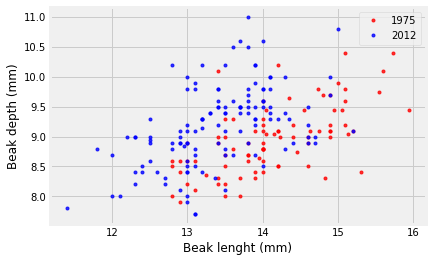

In [9]:
scandens_bl_12 = np.array(scandens_12['blength'].tolist())
scandens_bl_75 = np.array(scandens_75['blength'].tolist())

plt.plot(scandens_bl_75, scandens_bd_75, marker = '.', linestyle = 'none', color = 'red', alpha = 0.8)
plt.plot(scandens_bl_12, scandens_bd_12, marker = '.', linestyle = 'none', color = 'blue', alpha = 0.8)
plt.xlabel('Beak lenght (mm)')
plt.ylabel('Beak depth (mm)')
plt.legend(('1975', '2012'), loc = 'best')
plt.show()

From the scatter plot we see that the lenght of beak have not really increased, intead the depth of the beak got deeper. Seems the shape of beak became shorter and deeper.
Now, its time for linear regression.  I'll perform linear regression for both data sets and pairs bootstrap estimates for the regression parameters.

In [10]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(shape = size)
    bs_intercept_reps = np.empty(shape = size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size = len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


In [11]:
# linear regression for both data sets
slope_75, intercept_75 = np.polyfit(scandens_bl_75, scandens_bd_75, 1)
slope_12, intercept_12 = np.polyfit(scandens_bl_12, scandens_bd_12, 1)

# defining a fuction to do pairs bootstrap
def gen_pairs_bs_linreg(x_data, y_data, size = 1):
    indx = np.arange(len(x_data)) # an array for sampling from indices
    bs_slope_reps = np.empty(shape=size)
    bs_intercept_reps = np.empty(shape=size)
    
    for i in range(size):
        bs_indx = np.random.choice(indx, size = len(indx))
        bs_x_data, bs_y_data = x_data[bs_indx], y_data[bs_indx]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x_data, bs_y_data, 1)
    return bs_slope_reps, bs_intercept_reps

# getting 100,000 pairs bootstrap samples for linear regression
bs_slope_reps_75, bs_intercept_reps_75 = gen_pairs_bs_linreg(scandens_bl_75, scandens_bd_75, size = 100000)
bs_slope_reps_12, bs_intercept_reps_12 = gen_pairs_bs_linreg(scandens_bl_12, scandens_bd_12, size = 100000)

# calculating 95% confidence interval for all linear regressions
conf_int_slope_75 = np.percentile(bs_slope_reps_75, [2.5, 97.5])
conf_int_slope_12 = np.percentile(bs_slope_reps_12, [2.5, 97.5])
conf_int_intercept_75 = np.percentile(bs_intercept_reps_75, [2.5, 97.5])
conf_int_intercept_12 = np.percentile(bs_intercept_reps_12, [2.5, 97.5])

print('Slope 1975: {}, Confidence interval: {}'.format(slope_75, conf_int_slope_75))
print('Slope 2012: {}, Confidence interval: {}'.format(slope_12, conf_int_slope_12))
print('Intercept 75: {}, Confidence interval: {}'.format(intercept_75, conf_int_intercept_75))
print('Intercept 12: {}, Confidence interval: {}'.format(intercept_12, conf_int_intercept_12))



Slope 1975: 0.4652051691605937, Confidence interval: [0.33261495 0.59168115]
Slope 2012: 0.462630358835313, Confidence interval: [0.3319932  0.60052478]
Intercept 75: 2.3908752365842267, Confidence interval: [0.61329232 4.25405023]
Intercept 12: 2.9772474982360198, Confidence interval: [1.14565659 4.73075219]


As you can see, they have the same slope but different intercepts. Let's plot our results.

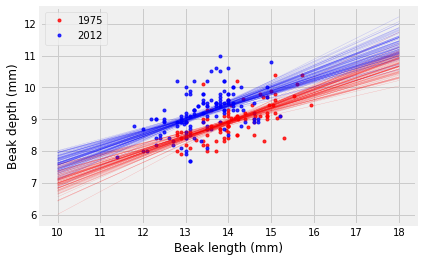

In [12]:
# scatter plot of both data sets' linear regression results
plt.plot(scandens_bl_75, scandens_bd_75, marker = '.', linestyle = 'none', color = 'red', alpha = 0.8)
plt.plot(scandens_bl_12, scandens_bd_12, marker = '.', linestyle = 'none', color = 'blue', alpha= 0.8)

plt.xlabel('Beak length (mm)')
plt.ylabel('Beak depth (mm)')
plt.legend(('1975', '2012'), loc = 'best')

x = np.array([10, 18])

for i in range(100):
    plt.plot(x, bs_slope_reps_75[i]*x+bs_intercept_reps_75[i], color = 'red', linewidth = 0.3, alpha = 0.3)
    plt.plot(x, bs_slope_reps_12[i]*x+bs_intercept_reps_12[i], color = 'blue', linewidth = 0.3, alpha = 0.3)
plt.show()



The information gained from the vizualized linear regressions shows that the geometry of  beak has changed over time. Roughly, we see that for every gained millimeter of length, the birds' beak depth got half a millimeter deeper.  So, to observe the change in shape of beak we need to calculate the ration between beak length and beak depth, and bootstrap for sure.

In [13]:
ratio_75 = scandens_bl_75/scandens_bd_75
ratio_12 = scandens_bl_12/scandens_bd_12

mean_ratio_75 = np.mean(ratio_75)
mean_ratio_12 = np.mean(ratio_12)

ratio_bs_reps_75 = gen_bs_reps(ratio_75, np.mean, size = 100000)
ratio_bs_reps_12 = gen_bs_reps(ratio_12, np.mean, size = 100000)

# 99% confidence interval
conf_int_ratio_75 = np.percentile(ratio_bs_reps_75, [0.5, 99.5])
conf_int_ratio_12 = np.percentile(ratio_bs_reps_12, [0.5, 99.5])

print('mean ratio 1975: {}, 99% CI: {}'.format(mean_ratio_75, conf_int_ratio_75))
print('mean ratio 2012: {}, 99% CI: {}'.format(mean_ratio_12, conf_int_ratio_12))

mean ratio 1975: 1.5788823771858533, 99% CI: [1.55673696 1.60103827]
mean ratio 2012: 1.4658342276847767, 99% CI: [1.4442659  1.48765677]


Without computing a p-value, there is a possibility that the result we got is just due to noise. Let's compute p-value to make sure that this is a real effect.

In [14]:
comb_mean_bl = np.mean(np.concatenate((scandens_bl_12, scandens_bl_75)))

shifted_bl_12 = scandens_bl_12 - np.mean(scandens_bl_12) + comb_mean_bl
shifted_bl_75 = scandens_bl_75 - np.mean(scandens_bl_75) + comb_mean_bl

shifted_bs_bl_reps_12 = gen_bs_reps(shifted_bl_12, np.mean, size = 100000)
shifted_bs_bl_reps_75 = gen_bs_reps(shifted_bl_75, np.mean, size = 100000)

reps_mean_ratio_12 = shifted_bs_bl_reps_12/shifted_bs_bd_reps_12
reps_mean_ratio_75 = shifted_bs_bl_reps_75/shifted_bs_bd_reps_75

p_ratio_12 = np.sum(reps_mean_ratio_12 >= mean_ratio_12)/len(reps_mean_ratio_12)
p_ratio_75 = np.sum(reps_mean_ratio_75 >= mean_ratio_75)/len(reps_mean_ratio_75)

print('mean ratio 1975 p-value: ', p_ratio_75)
print("mean ratio 2012 p-value: ", p_ratio_12)




mean ratio 1975 p-value:  0.0
mean ratio 2012 p-value:  0.99972
